##### Copyright 2018 The TensorFlow Authors. [Licensed under the Apache License, Version 2.0](#scrollTo=ByZjmtFgB_Y5).

In [ ]:
// #@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
// https://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/swift/tutorials/python_interoperability"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/swift/tutorials/python_interoperability.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/swift/tutorials/python_interoperability.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />깃허브(GitHub)에서 소스 보기</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/swift/tutorials/python_interoperability.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도
불구하고 [공식 영문 문서](https://www.tensorflow.org/?hl=en)의 내용과 일치하지 않을 수 있습니다.
이 번역에 개선할 부분이 있다면
[tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n/) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다.
문서 번역이나 리뷰에 참여하려면
[docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로
메일을 보내주시기 바랍니다.

# 파이썬 상호 호환성

텐서플로를 위한 스위프트는 파이썬과 상호 호환됩니다.

스위프트에서 파이썬 모듈을 임포트해서, 스위프트와 파이썬 사이의 값을 바꾸거나 파이썬 함수를 호출할 수 있습니다.

In [2]:
// comment so that Colab does not interpret `#if ...` as a comment
#if canImport(PythonKit)
    import PythonKit
#else
    import Python
#endif
print(Python.version)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


## 파이썬 버전 설정

기본적으로 `import Python`를 하면, 스위프트는 시스템 라이브러리 경로에 따라 설치된 최신 버전의 파이썬을 검색합니다. 
특정한 파이썬을 설치하려면, `PYTHON_LIBRARY` 환경변수에 설치시 제공받은 `libpython` 공유 라이브러리를 설정합니다.  예를 들어: 

`export PYTHON_LIBRARY="~/anaconda3/lib/libpython3.7m.so"`

정확한 파일명은 파이썬 환경과 플랫폼마다 다를 수 있습니다.

또는 스위프트가 시스템 라이브러리 경로에서 알맞은 파이썬 버전을 찾도록 해서 `PYTHON_VERSION` 환경변수를 설정할 수 있습니다. `PYTHON_LIBRARY`가 `PYTHON_VERSION` 보다 우선한다는 점을 유의해야 합니다.

또한 코드에서 `PYTHON_VERSION` 설정과 동일한 기능을 하는 `PythonLibrary.useVersion` 함수를 호출할 수 있습니다.

In [ ]:
// PythonLibrary.useVersion(2)
// PythonLibrary.useVersion(3, 7)

__Note: 파이썬을 임포트한 직후, 파이썬 코드를 호출하기 전에 `PythonLibrary.useVersion`을 실행해야 합니다. 이것은 파이썬 버전을 동적으로 바꾸는 데 사용될 수 없습니다.__

[파이썬 라이브러리 로딩 과정에서 생성되는 디버그 출력](https://github.com/apple/swift/pull/20674#discussion_r235207008)을 확인하기 위해서 `PYTHON_LOADER_LOGGING=1`를 설정하세요.  

## 기초

스위프트에서 `PythonObject`는 파이썬 객체를 나타냅니다.
모든 파이썬 API는 `PythonObject` 인스턴스를 사용하거나 반환합니다.

스위프트에서 기본형(숫자 및 배열처럼)은 `PythonObject`로 전환할 수 있습니다. 몇몇 경우에 (`PythonConvertible` 인수를 받는 리터럴과 함수의 경우), 변환이 암묵적으로 일어납니다. 스위프트 값을 `PythonObject`에 명시적으로 지정하려면 `PythonObject` 이니셜라이저를 사용합니다.

`PythonObject`는 숫자 연산, 인덱싱, 반복을 포함한 많은 표준 연산을 정의합니다.

In [4]:
// 표준 스위프트 자료형을 Python으로 변환합니다.
let pythonInt: PythonObject = 1
let pythonFloat: PythonObject = 3.0
let pythonString: PythonObject = "Hello Python!"
let pythonRange: PythonObject = PythonObject(5..<10)
let pythonArray: PythonObject = [1, 2, 3, 4]
let pythonDict: PythonObject = ["foo": [0], "bar": [1, 2, 3]]

// 파이썬 객체에 표준 연산을 수행합니다.
print(pythonInt + pythonFloat)
print(pythonString[0..<6])
print(pythonRange)
print(pythonArray[2])
print(pythonDict["bar"])

4.0
Hello 
slice(5, 10, None)
3
[1, 2, 3]


In [5]:
// 파이썬 객체를 다시 스위프트로 변환합니다.
let int = Int(pythonInt)!
let float = Float(pythonFloat)!
let string = String(pythonString)!
let range = Range<Int>(pythonRange)!
let array: [Int] = Array(pythonArray)!
let dict: [String: [Int]] = Dictionary(pythonDict)!

// 표준 연산을 수행합니다.
// 출력은 파이썬과 동일합니다!
print(Float(int) + float)
print(string.prefix(6))
print(range)
print(array[2])
print(dict["bar"]!)

4.0
Hello 
5..<10
3
[1, 2, 3]


`PythonObject`는 많은 표준 스위프트 프로토콜에 대해 적합하도록 정의합니다:
* `Equatable`
* `Comparable`
* `Hashable`
* `SignedNumeric`
* `Strideable`
* `MutableCollection`
* 모든 `ExpressibleBy_Literal` 프로토콜

이러한 적합성은 형안전(type-safe)하지 않다는 점에 유의해야 합니다: 호환되지 않는 `PythonObject` 인스턴스에서 프로토콜 기능을 사용하려고 할 때 충돌이 발생할 수 있습니다.

In [6]:
let one: PythonObject = 1
print(one == one)
print(one < one)
print(one + one)

let array: PythonObject = [1, 2, 3]
for (i, x) in array.enumerated() {
  print(i, x)
}

true
false
2
0 1
1 2
2 3


튜플을 파이썬에서 스위프트로 변환하려면, 정확한 튜플의 길이를 알아야 합니다.

다음 인스턴스 메서드 중 하나를 호출합니다:
- `PythonObject.tuple2`
- `PythonObject.tuple3`
- `PythonObject.tuple4`

In [7]:
let pythonTuple = Python.tuple([1, 2, 3])
print(pythonTuple, Python.len(pythonTuple))

// 스위프트로 변환합니다.
let tuple = pythonTuple.tuple3
print(tuple)

(1, 2, 3) 3
(1, 2, 3)


## 파이썬 내장 객체

전역 `Python` 인터페이스를 활용해 파이썬 내장 객체에 접근합니다.

In [8]:
// `Python.builtins`은 모든 파이썬 내장 객체의 딕셔너리입니다.
_ = Python.builtins

// 파이썬 내장 객체를 사용합니다.
print(Python.type(1))
print(Python.len([1, 2, 3]))
print(Python.sum([1, 2, 3]))

<class 'int'>
3
6


## 파이썬 모듈 임포트

`Python.import`를 사용하여 파이썬 모듈을 임포트합니다. 이것은 `Python`의 `import` 키워드처럼 동작합니다.

In [9]:
let np = Python.import("numpy")
print(np)
let zeros = np.ones([2, 3])
print(zeros)

<module 'numpy' from '/usr/local/lib/python3.6/dist-packages/numpy/__init__.py'>
[[1. 1. 1.]
 [1. 1. 1.]]


안전하게 패키지를 가져오기 위해 예외처리 함수 `Python.attemptImport`를 사용하세요.

In [10]:
let maybeModule = try? Python.attemptImport("nonexistent_module")
print(maybeModule)

nil


## `numpy.ndarray`로 변환

다음 스위프트 자료형은 `numpy.ndarray`로 변환할 수 있습니다:
- `Array<Element>`
- `ShapedArray<Scalar>`
- `Tensor<Scalar>`

`Numpy.ndarray`의 `dtype`이 `Element` 또는 `Scalar`의 일반 파라미터 타입과 호환되어야만 변환이 성공합니다.

`Array`의 경우 `numpy.ndarray`가 1-D일 경우에만 `numpy`에서 변환이 성공합니다.

In [11]:
import TensorFlow

let numpyArray = np.ones([4], dtype: np.float32)
print("Swift type:", type(of: numpyArray))
print("Python type:", Python.type(numpyArray))
print(numpyArray.shape)

Swift type: PythonObject
Python type: <class 'numpy.ndarray'>
(4,)


In [12]:
// `numpy.ndarray`에서 스위프트 타입으로 변환하는 예제.
let array: [Float] = Array(numpy: numpyArray)!
let shapedArray = ShapedArray<Float>(numpy: numpyArray)!
let tensor = Tensor<Float>(numpy: numpyArray)!

// 스위프트 타입에서 `numpy.ndarray`으로 변환하는 예제.
print(array.makeNumpyArray())
print(shapedArray.makeNumpyArray())
print(tensor.makeNumpyArray())

// dtype이 다른 예제.
let doubleArray: [Double] = Array(numpy: np.ones([3], dtype: np.float))!
let intTensor = Tensor<Int32>(numpy: np.ones([2, 3], dtype: np.int32))!

[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]


## 이미지 표시

파이썬 노트북에서처럼 `matplotlib`를 이용해 이미지를 결과 창에 표시할 수 있습니다.

In [13]:
// 주피터 노트북에 그래프를 표시하기 위한 셀입니다.
// 다른 환경에서는 사용하지 마세요.
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


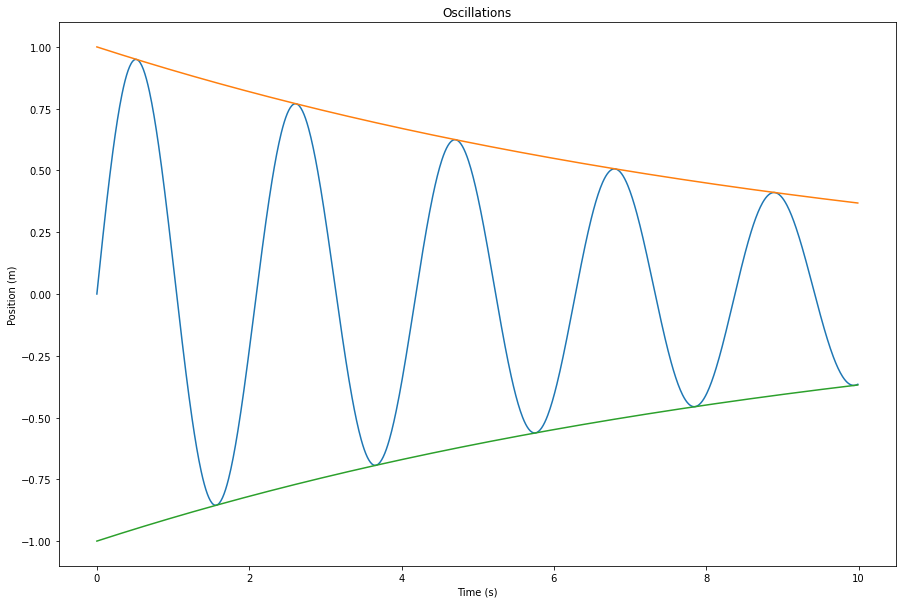

None


In [14]:
let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")

let time = np.arange(0, 10, 0.01)
let amplitude = np.exp(-0.1 * time)
let position = amplitude * np.sin(3 * time)

plt.figure(figsize: [15, 10])

plt.plot(time, position)
plt.plot(time, amplitude)
plt.plot(time, -amplitude)

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Oscillations")

plt.show()